## Importing relevant libraries

In [1]:
import numpy as np 
import pandas as pd 

import json 
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors

### Reading the dataset

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/Capstone/sg.csv")

In [3]:
sg_data = df[["city","lat","lng","admin_name"]]

In [4]:
sg_data.rename({"city":"City","lat":"Latitude","lng":"Longitude","admin_name":"Region"}, axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
sg_data.reset_index(drop=True, inplace=True)

The dataset is having 75 rows, which means the dataset is having 75 cities with their repective Coordinates.

In [6]:
sg_data.head(20)

,City,Latitude,Longitude,Region
0,Singapore,1.3000,103.8000,Central Singapore
1,Keat Hong Village,1.3778,103.7442,South West
2,Choa Chu Kang New Town,1.3833,103.7500,South West
3,Bukit Panjang Estate,1.3817,103.7525,South West
4,Jalan Kayu,1.3972,103.8719,Central Singapore
5,Bukit Sembawang Estate,1.3956,103.8692,Central Singapore
6,Kampong Serangoon Kechil,1.3900,103.9072,North East
7,Kampong Cutforth,1.3819,103.7364,South West
8,Mok Peng Hiang Estate,1.4456,103.7969,North West
9,Woodlands New Town,1.4363,103.7867,North West


In [7]:
sg_data["Region"].value_counts()

Central Singapore    21
South West           21
North West           19
South East            7
North East            7
Name: Region, dtype: int64

### Exploring the cities in Singapore

In [8]:
address = "Singapore"

geolocator = Nominatim(user_agent="http")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore  are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore  are 1.357107, 103.8194992.


In [9]:
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, city, area in zip(sg_data['Latitude'], sg_data['Longitude'], sg_data['City'], sg_data['Region']):
    label = '{},{}'.format(city, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

### Filtering the cities of Western Region

In [10]:
sg_data = sg_data[(sg_data["Region"] == "South East") | (sg_data["Region"] == "North East")]

### Observing the cities in Western Region

In [11]:
map_singapore = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, city, area in zip(sg_data['Latitude'], sg_data['Longitude'], sg_data['City'], sg_data['Region']):
    label = '{},{}'.format(city, area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

### Define Foursquare credentials

In [12]:
LIMIT = 100
CLIENT_ID = 'XR2AAWEBS42SJXOCQMTLTUVQZPO1Q021A15MHKHWQKOFQ2C2' 
CLIENT_SECRET = 'PI43RD1L4534J3UGA2OJBOSNPJP03AQ4Q254H4VBBNJCWBNI'
VERSION = '20180605'

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: XR2AAWEBS42SJXOCQMTLTUVQZPO1Q021A15MHKHWQKOFQ2C2
CLIENT_SECRET:PI43RD1L4534J3UGA2OJBOSNPJP03AQ4Q254H4VBBNJCWBNI


### Let's explore the cities in Western Region in Singapore

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
singapore_venues = getNearbyVenues(names=sg_data['City'],
                                   latitudes=sg_data['Latitude'],
                                   longitudes=sg_data['Longitude']
                                  )

Kampong Serangoon Kechil
Kampong Teban
Kangkar
Kampong Beremban
Kampong Chai Chee
Ulu Bedok
Kampong Pachitan
Bedok New Town
Bedok Ville
Kampong Ubi
Kampong Loyang
Kampong Sungai Blukar
Kampong Punggol
Kampong Pasir Ris


In [15]:
singapore_venues.head(10)

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kampong Serangoon Kechil,1.39,103.9072,Subway,1.392211,103.904955,Sandwich Place
1,Kampong Serangoon Kechil,1.39,103.9072,Ice Talk Xpress,1.394152,103.912813,Bubble Tea Shop
2,Kampong Serangoon Kechil,1.39,103.9072,KFC,1.392545,103.904667,Fast Food Restaurant
3,Kampong Serangoon Kechil,1.39,103.9072,Nihon Mura Express,1.392104,103.905114,Japanese Restaurant
4,Kampong Serangoon Kechil,1.39,103.9072,McDonald's,1.393536,103.913326,Fast Food Restaurant
5,Kampong Serangoon Kechil,1.39,103.9072,Master Crab @ Kopitiam,1.396699,103.908607,Chinese Restaurant
6,Kampong Serangoon Kechil,1.39,103.9072,Foodpark,1.388895,103.909468,Coffee Shop
7,Kampong Serangoon Kechil,1.39,103.9072,Heavenly Wang,1.385736,103.901558,Breakfast Spot
8,Kampong Serangoon Kechil,1.39,103.9072,NTUC FairPrice,1.385713,103.902704,Supermarket
9,Kampong Serangoon Kechil,1.39,103.9072,McDonald's,1.392176,103.905051,Fast Food Restaurant


### Getting the number of venues obtained for each city

In [16]:
singapore_venues.groupby('City')[["Venue"]].count()

,Venue
City,
Bedok New Town,91
Bedok Ville,18
Kampong Beremban,5
Kampong Chai Chee,82
Kampong Loyang,42
Kampong Pachitan,70
Kampong Pasir Ris,33
Kampong Punggol,39
Kampong Serangoon Kechil,26


### Using one hot encoding to get the dummies of Categorical values.

In [17]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['City'] = singapore_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,City,Airport,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beach,...,Sushi Restaurant,Thai Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wings Joint
0,Kampong Serangoon Kechil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kampong Serangoon Kechil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kampong Serangoon Kechil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Kampong Serangoon Kechil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kampong Serangoon Kechil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
singapore_grouped = singapore_onehot.groupby('City').mean().reset_index()
singapore_grouped

,City,Airport,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beach,...,Sushi Restaurant,Thai Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfront,Wings Joint
0,Bedok New Town,0.0,0.010989,0.000000,0.021978,0.000000,0.021978,0.000000,0.010989,0.000000,...,0.021978,0.010989,0.000000,0.000000,0.010989,0.00,0.000000,0.00000,0.000000,0.010989
1,Bedok Ville,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
2,Kampong Beremban,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
3,Kampong Chai Chee,0.0,0.012195,0.012195,0.060976,0.012195,0.024390,0.000000,0.000000,0.000000,...,0.000000,0.036585,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
4,Kampong Loyang,0.0,0.023810,0.000000,0.023810,0.000000,0.000000,0.000000,0.000000,0.023810,...,0.000000,0.047619,0.000000,0.000000,0.000000,0.00,0.000000,0.02381,0.000000,0.000000
5,Kampong Pachitan,0.0,0.014286,0.000000,0.057143,0.014286,0.028571,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014286,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
6,Kampong Pasir Ris,0.0,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.030303,0.00000,0.000000,0.000000
7,Kampong Punggol,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,...,0.000000,0.051282,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.025641,0.000000
8,Kampong Serangoon Kechil,0.0,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
9,Kampong Sungai Blukar,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,...,0.000000,0.000000,0.038462,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000


### Obtaining the top 10 venues in each city

In [19]:
num_top_venues = 10

for city in singapore_grouped['City']:
    print("----"+city+"----")
    temp = singapore_grouped[singapore_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bedok New Town----
                  venue  freq
0           Coffee Shop  0.11
1    Chinese Restaurant  0.09
2            Food Court  0.07
3                  Café  0.05
4          Noodle House  0.05
5        Sandwich Place  0.03
6           Supermarket  0.03
7  Fast Food Restaurant  0.03
8                Bakery  0.02
9   Japanese Restaurant  0.02


----Bedok Ville----
                venue  freq
0        Noodle House  0.11
1            Bus Line  0.06
2         Supermarket  0.06
3        Dessert Shop  0.06
4         Coffee Shop  0.06
5         Golf Course  0.06
6  Chinese Restaurant  0.06
7                 Gym  0.06
8            Bus Stop  0.06
9         Bus Station  0.06


----Kampong Beremban----
        venue  freq
0     Airport   0.2
1       River   0.2
2   Pet Store   0.2
3    Bus Stop   0.2
4        Farm   0.2
5   Multiplex   0.0
6   Pool Hall   0.0
7        Pool   0.0
8       Plaza   0.0
9  Playground   0.0


----Kampong Chai Chee----
                venue  freq
0         Coff

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = singapore_grouped['City']

for ind in np.arange(singapore_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bedok New Town,Coffee Shop,Chinese Restaurant,Food Court,Café,Noodle House,Supermarket,Sandwich Place,Fast Food Restaurant,Fried Chicken Joint,Indian Restaurant
1,Bedok Ville,Noodle House,Dessert Shop,Supermarket,Coffee Shop,Food Court,Chinese Restaurant,Bus Stop,Bus Station,Bus Line,Golf Course
2,Kampong Beremban,Airport,Farm,Pet Store,River,Bus Stop,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Flower Shop
3,Kampong Chai Chee,Coffee Shop,Chinese Restaurant,Food Court,Noodle House,Asian Restaurant,Café,Sandwich Place,Thai Restaurant,Ice Cream Shop,Italian Restaurant
4,Kampong Loyang,Coffee Shop,Fast Food Restaurant,Resort,Food Court,Chinese Restaurant,Bus Station,Thai Restaurant,Convenience Store,Park,Playground


### Finding the optimal number of clusters using the Sillhouette Scoring method

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [23]:
max_range = 6

singapore_grouped_clustering = singapore_grouped.drop('City', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = singapore_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

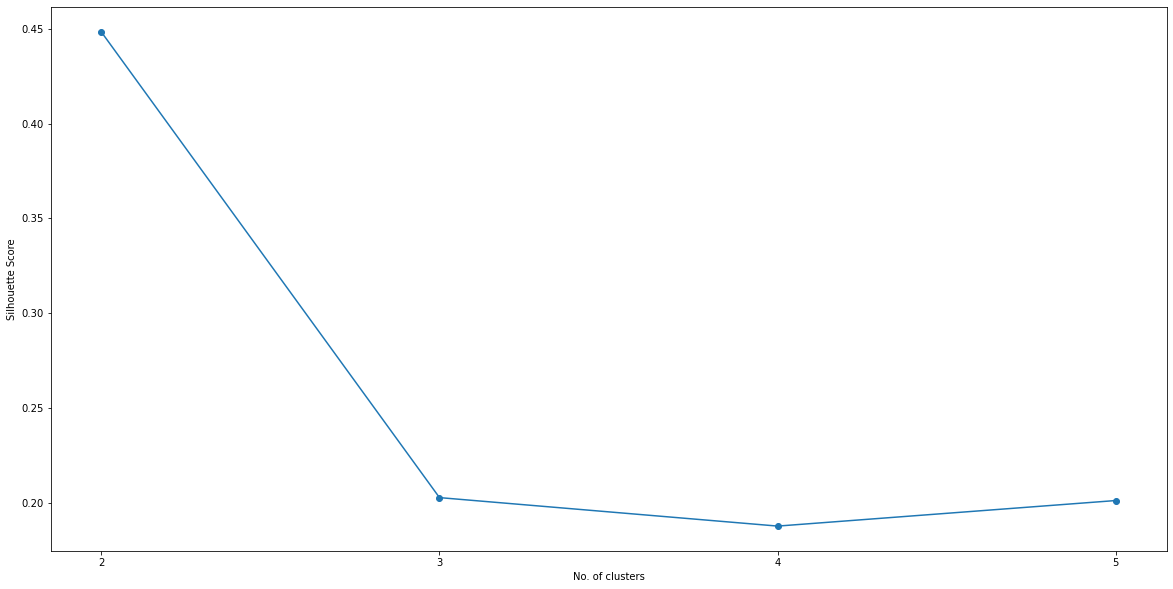

In [24]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### Clustering the data

In [25]:
# set number of clusters
kclusters = 2

singapore_grouped_clustering = singapore_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [26]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

singapore_merged = sg_data

singapore_merged = singapore_merged.join(city_venues_sorted.set_index('City'), on='City')

singapore_merged.head(10) 

,City,Latitude,Longitude,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kampong Serangoon Kechil,1.3900,103.9072,North East,0,Fast Food Restaurant,Bus Station,Food Court,Chinese Restaurant,Coffee Shop,Pharmacy,Japanese Restaurant,Sandwich Place,Bubble Tea Shop,Breakfast Spot
14,Kampong Teban,1.3786,103.9078,North East,0,Bus Station,Food Court,Trail,Bus Stop,Park,Basketball Court,Playground,Indonesian Restaurant,Gym,Gym / Fitness Center
15,Kangkar,1.3761,103.9017,North East,0,Food Court,Bus Station,Coffee Shop,Fast Food Restaurant,Supermarket,Basketball Court,Café,Sandwich Place,Kitchen Supply Store,Residential Building (Apartment / Condo)
22,Kampong Beremban,1.3814,103.9158,North East,1,Airport,Farm,Pet Store,River,Bus Stop,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Flower Shop
28,Kampong Chai Chee,1.3333,103.9333,South East,0,Coffee Shop,Chinese Restaurant,Food Court,Noodle House,Asian Restaurant,Café,Sandwich Place,Thai Restaurant,Ice Cream Shop,Italian Restaurant
29,Ulu Bedok,1.3333,103.9333,South East,0,Coffee Shop,Chinese Restaurant,Food Court,Noodle House,Asian Restaurant,Café,Sandwich Place,Thai Restaurant,Ice Cream Shop,Italian Restaurant
30,Kampong Pachitan,1.3167,103.9167,South East,0,Coffee Shop,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Gastropub,Food Court,Pizza Place,Restaurant,Fast Food Restaurant,Café
31,Bedok New Town,1.3236,103.9273,South East,0,Coffee Shop,Chinese Restaurant,Food Court,Café,Noodle House,Supermarket,Sandwich Place,Fast Food Restaurant,Fried Chicken Joint,Indian Restaurant
33,Bedok Ville,1.3244,103.9544,South East,0,Noodle House,Dessert Shop,Supermarket,Coffee Shop,Food Court,Chinese Restaurant,Bus Stop,Bus Station,Bus Line,Golf Course
43,Kampong Ubi,1.3167,103.9000,South East,0,Coffee Shop,Chinese Restaurant,Food Court,Asian Restaurant,Noodle House,Fast Food Restaurant,Seafood Restaurant,Malay Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant


In [27]:
singapore_merged.dropna(inplace=True)
singapore_merged["Cluster Labels"] = singapore_merged["Cluster Labels"].astype(int)

### Observing the clusters

In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['City'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 01

In [29]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kampong Serangoon Kechil,Fast Food Restaurant,Bus Station,Food Court,Chinese Restaurant,Coffee Shop,Pharmacy,Japanese Restaurant,Sandwich Place,Bubble Tea Shop,Breakfast Spot
14,Kampong Teban,Bus Station,Food Court,Trail,Bus Stop,Park,Basketball Court,Playground,Indonesian Restaurant,Gym,Gym / Fitness Center
15,Kangkar,Food Court,Bus Station,Coffee Shop,Fast Food Restaurant,Supermarket,Basketball Court,Café,Sandwich Place,Kitchen Supply Store,Residential Building (Apartment / Condo)
28,Kampong Chai Chee,Coffee Shop,Chinese Restaurant,Food Court,Noodle House,Asian Restaurant,Café,Sandwich Place,Thai Restaurant,Ice Cream Shop,Italian Restaurant
29,Ulu Bedok,Coffee Shop,Chinese Restaurant,Food Court,Noodle House,Asian Restaurant,Café,Sandwich Place,Thai Restaurant,Ice Cream Shop,Italian Restaurant
30,Kampong Pachitan,Coffee Shop,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Gastropub,Food Court,Pizza Place,Restaurant,Fast Food Restaurant,Café
31,Bedok New Town,Coffee Shop,Chinese Restaurant,Food Court,Café,Noodle House,Supermarket,Sandwich Place,Fast Food Restaurant,Fried Chicken Joint,Indian Restaurant
33,Bedok Ville,Noodle House,Dessert Shop,Supermarket,Coffee Shop,Food Court,Chinese Restaurant,Bus Stop,Bus Station,Bus Line,Golf Course
43,Kampong Ubi,Coffee Shop,Chinese Restaurant,Food Court,Asian Restaurant,Noodle House,Fast Food Restaurant,Seafood Restaurant,Malay Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant
57,Kampong Loyang,Coffee Shop,Fast Food Restaurant,Resort,Food Court,Chinese Restaurant,Bus Station,Thai Restaurant,Convenience Store,Park,Playground


### Cluster 02

In [30]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[0] + list(range(5, singapore_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Kampong Beremban,Airport,Farm,Pet Store,River,Bus Stop,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Fishing Spot,Flower Shop
